<a href="https://colab.research.google.com/github/RanajayBiswas/Play-Store-App-Review-Analysis-EDA-Project/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [2]:
# importing the helps
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Getting to know our first data set ---> Play Store Dataset**



In [4]:
# reading the playstore apps data set
df = pd.read_csv('/content/drive/MyDrive/Projects Almabetter/EDA Project on Google Playstore Dataset/Play Store Data.csv')

In [5]:
# making a copy of the main dataframe for furthur use
playstore_df = df.copy()

In [6]:
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
# checking the cols
playstore_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [8]:
# checking the shape
playstore_df.shape

(10841, 13)

In [9]:
# getting idea of the data types present
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [10]:
# checking for initial numerical variables
playstore_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


So, right now we only have one column with numerical value which is the Rating column

In [11]:
# understanding which columns has what number of null values
playstore_df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## The Cleansing and the filling process begins --->

---



---



### Starting with the ---> Rating column

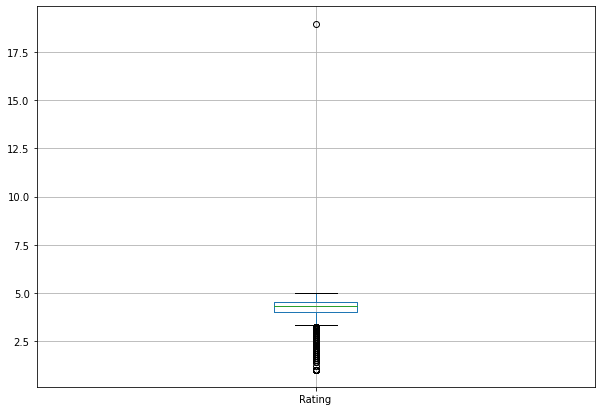

In [12]:
playstore_df.boxplot(figsize = (10,7))

# plt.show

It seems like we have one outlier

---



### Let's get rid of the outlier and the nonsense values.
As, there should not be any value above 5.0 and less than 1.0, so, we will first check how many rows we have with rating more than 5.0 and less than 1.0

In [13]:
playstore_df[(playstore_df['Rating']> 5.0) | (playstore_df['Rating']< 1.0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


So, we only have one such row. Let's just drop the row to keep the authenticity of the data set

In [14]:
# dataframe with all the rows except that one row with nonsensical rating value
playstore_df.drop(playstore_df[(playstore_df['Rating']> 5.0) | (playstore_df['Rating']< 1.0)].index, inplace= True)


In [15]:
playstore_df[10469:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10469,TownWiFi | Wi-Fi Everywhere,COMMUNICATION,3.9,2372,58M,"500,000+",Free,0,Everyone,Communication,"August 2, 2018",4.2.1,4.2 and up
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


We had one outlier, let's check the skewness now

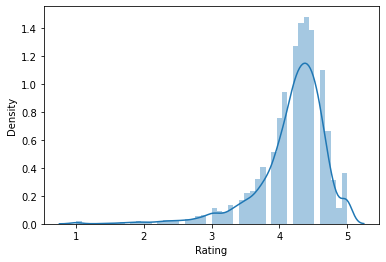

In [16]:
# playstore_df.plot(kind = 'density')
sns.distplot(playstore_df.Rating)

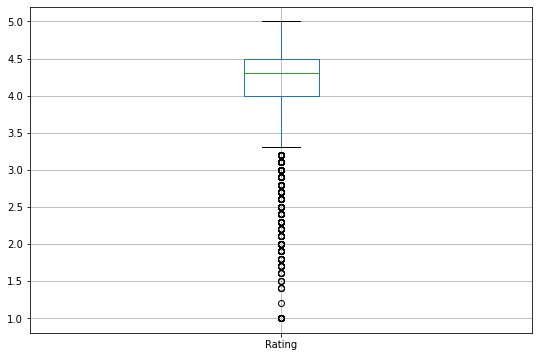

In [17]:
playstore_df.boxplot(figsize = (9,6))

In [18]:
playstore_df.shape

(10840, 13)

###  As our data is right skewed and seems to be most of the values lie within 4.0 to 4.5
So, we are going to use the median to fill the null values in the ratings columns with

In [19]:
# fill all the rows where the rating col value is null
playstore_df['Rating'].fillna(float(playstore_df['Rating'].median()), inplace=True)


In [20]:
# let's see the null values again
playstore_df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

### Next we have Type, Current version and Android version columns to work on
These columns have categorical data. So, we are going to choose mode for replacing the na values values in those columns

In [21]:
# first checking the modes ----->
Curr_ver_mode  = playstore_df['Current Ver'].mode()
print(Curr_ver_mode)
Android_ver_mode  = playstore_df['Android Ver'].mode()
print(Android_ver_mode)
app_type = playstore_df['Type'].mode()
print(app_type)

0    Varies with device
dtype: object
0    4.1 and up
dtype: object
0    Free
dtype: object


In [22]:
# replacing null values with the modes --->
playstore_df['Current Ver'].fillna(str(playstore_df['Current Ver'].mode()), inplace=True)

playstore_df['Android Ver'].fillna(str(playstore_df['Android Ver'].mode()), inplace=True)

playstore_df['Type'].fillna(str(playstore_df['Type'].mode()), inplace=True)

In [23]:
# making sure we got rid of all the null values
playstore_df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [24]:
playstore_df.shape

(10840, 13)

## So, we have removed all the null values from our data set...

## But the problem that stands before us now is that some of the columns technically should be numerical and need to be numerical, So that we get the preferred results...

In [25]:
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## It initially looks like Reviews, Installs and Price columns are categorical. Whereas, we need them to be numerical to do visualizations. So, let's check what's the situation here --->

### For 'Price' column :

In [26]:
# checking the unique values in the price column
playstore_df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

###The problem is that we are having 'dollar' sign infront of the values which are not 0 in our 'Price' column.
Let's get rid of the dollar sign , and make the str values into float type ---->

In [27]:
# applying lambda function to replace '$' with nothing, and then convert str to numerical
playstore_df['Price'] = playstore_df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))

playstore_df['Price'] = playstore_df['Price'].apply(lambda x: float(x))


### Dealing with the Reviews column next.

In [28]:
playstore_df['Reviews'] = pd.to_numeric(playstore_df['Reviews'],errors='coerce')

###Installs column looks to have ',' and '+' sign assosiated with the values.
So, we need to remove them and then make them numeric

In [29]:
# getting rid of '+' and ',' in Installs column and converting them to numeric values
playstore_df['Installs'] = playstore_df['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))

playstore_df['Installs'] = playstore_df['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))

playstore_df['Installs'] = pd.to_numeric(playstore_df['Installs'],errors='coerce')

In [30]:
playstore_df.shape

(10840, 13)

### Let's check if our columns turned numeric or not

In [31]:
playstore_df.describe()

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


In [32]:
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  int64  
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.2+ MB


In [33]:
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Our dataset looks to all set to do visualizations now. 
## So, let's get started with some visualisatons ----->
### To have a perfect sense of what insights our data can give, we need to group our dataframe by Category and then we can see the correalation of category with rating, reviews and price etc..

In [34]:
# grouping by category ---->
category_df = playstore_df.groupby('Category')

### Category and Rating correlation graph

In [35]:
# average rating category wise ----> 
rating_category = category_df['Rating'].agg(np.mean)
print(rating_category)

Category
ART_AND_DESIGN         4.355385
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.335498
BUSINESS               4.182391
COMICS                 4.160000
COMMUNICATION          4.180103
DATING                 4.025641
EDUCATION              4.388462
ENTERTAINMENT          4.126174
EVENTS                 4.395313
FAMILY                 4.204564
FINANCE                4.151639
FOOD_AND_DRINK         4.185827
GAME                   4.286888
HEALTH_AND_FITNESS     4.280059
HOUSE_AND_HOME         4.211364
LIBRARIES_AND_DEMO     4.207059
LIFESTYLE              4.131414
MAPS_AND_NAVIGATION    4.075182
MEDICAL                4.216199
NEWS_AND_MAGAZINES     4.161837
PARENTING              4.300000
PERSONALIZATION        4.328827
PHOTOGRAPHY            4.197910
PRODUCTIVITY           4.226651
SHOPPING               4.263077
SOCIAL                 4.261017
SPORTS                 4.236458
TOOLS                  4.080071
TRAVEL_AND_LOCAL       4.132946

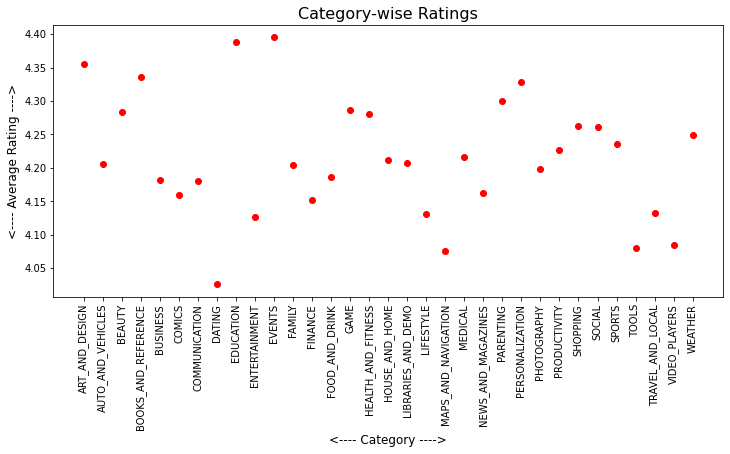

In [36]:
# plotting Categorywise Rating graph ----->
plt.figure(figsize=(12, 5))
plt.plot(rating_category, 'ro')
plt.xticks(rotation = 90)
plt.title('Category-wise Ratings', fontsize=16)
plt.xlabel('<---- Category ---->', fontsize=12)
plt.ylabel('<---- Average Rating ---->', fontsize=12)
plt.show()

### *From the above plot, we can say that apps with the highest average rating in the dataset falls into the category of -*

1. ART_AND_DESIGN
2. EDUCATION
3. EVENTS 

### *The lowest rated apps have been --->*  DATING apps

